In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import matplotlib.dates as md
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_parquet('newEScooter2.parquet', engine='pyarrow')

In [3]:
dfa = df.groupby([df.datetime.dt.hour]).agg({
    'rc_true': 'sum',
    'rc_false': 'sum'
            })

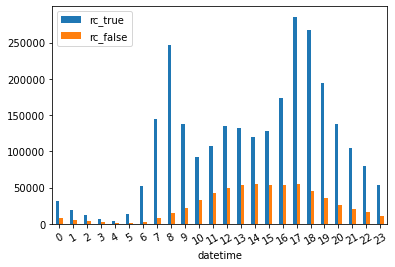

In [4]:
dfa = pd.DataFrame({'rc_true': dfa.rc_true,
                   'rc_false': dfa.rc_false}, dfa.index)

ax = dfa.plot.bar(rot=30)

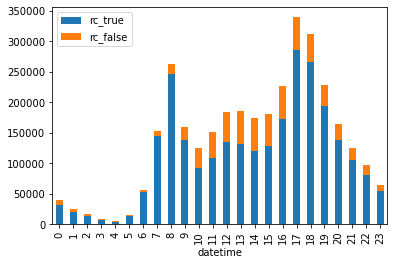

In [5]:
ax = dfa.plot.bar(stacked=True)

In [6]:
dfa['time_bins'] = pd.cut(dfa.index, bins=8)
dfb = dfa.groupby([dfa.time_bins]).agg({
    'rc_true': 'sum',
    'rc_false': 'sum'
            })
dfb

,rc_true,rc_false
time_bins,,
"(-0.023, 2.875]",64259,15367
"(2.875, 5.75]",23226,3684
"(5.75, 8.625]",443723,26575
"(8.625, 11.5]",338165,97946
"(11.5, 14.375]",386028,156996
"(14.375, 17.25]",586321,161518
"(17.25, 20.125]",598655,106607
"(20.125, 23.0]",238797,48154


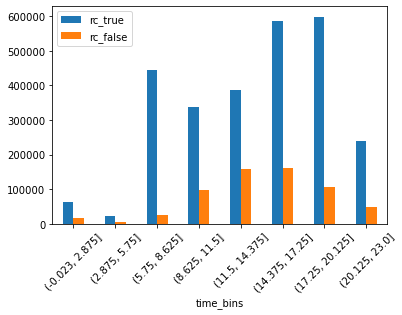

In [7]:
ax = dfb.plot.bar(rot=45)

<AxesSubplot:xlabel='datetime', ylabel='rc_true'>

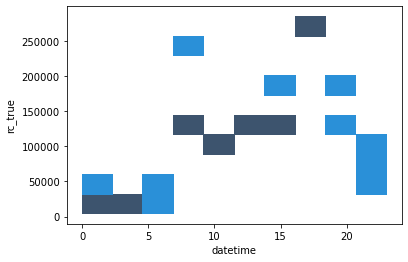

In [8]:
dfc = df.groupby([df.datetime.dt.hour]).agg({
  
    'rc_true': 'sum',
    'rc_false': 'sum'
            })
dfc.reset_index(level=0, inplace=True)
sns.histplot(y = dfc.rc_true,x = dfc['datetime'],bins = 10, kde=True)

<AxesSubplot:xlabel='datetime', ylabel='rc_false'>

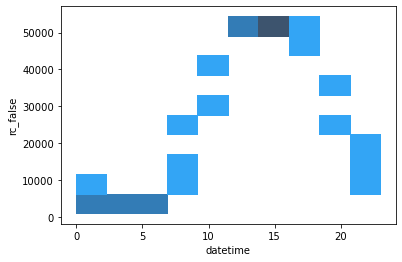

In [9]:
sns.histplot(y = dfc.rc_false,x = dfc['datetime'],bins = 10, kde=True)

In [10]:
def regres (s_y,s_m,e_y,e_m):
    
    start = dt.datetime.strptime(f'{s_y}-{s_m}-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    end = dt.datetime.strptime(f'{e_y}-{e_m}-01 00:00:00', '%Y-%m-%d %H:%M:%S')
 
    dfm = df.loc[(df.datetime >= start) & (df.datetime < end)]

    dfm = dfm.groupby([dfm.datetime.dt.to_period('D')],as_index = False).agg({
    
        'rc_true': 'sum',
        'rc_false': 'sum'
                })


    X = dfm.index.values.reshape(-1, 1)
    Y = dfm.iloc[:, 0].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

    print(linear_regressor.score(X, Y))

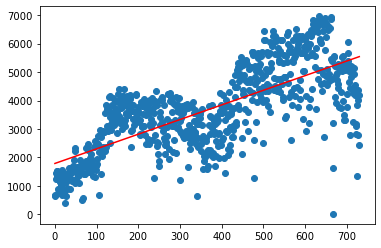

0.5284678379463936


In [11]:
regres(2019,1, 2021,1)

In [12]:
df = pd.read_parquet('newEScooter.parquet', engine='pyarrow')


In [13]:
df['month'] = pd.Series(df.datetime).dt.month_name()
y2020 = dt.datetime.strptime('2020-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
df2019 = df.loc[df.datetime < y2020]
df2020 = df.loc[df.datetime >= y2020]

In [14]:
df20191 = df2019.groupby([df2019.datetime.dt.to_period('M')]).agg({
    'month' : 'max',
    'rc_true': 'sum',
    'rc_false': 'sum'
            })
df20191
df20201 = df2020.groupby([df2020.datetime.dt.to_period('M')]).agg({
    'month' : 'max',
    'rc_true': 'sum',
    'rc_false': 'sum'
    
            })
df20201

,month,rc_true,rc_false
datetime,,,
2020-01,January,83969,9002
2020-02,February,92236,9311
2020-03,March,129299,29079
2020-04,April,134557,41636
2020-05,May,153818,41651
2020-06,June,160086,45159
2020-07,July,155666,41157
2020-08,August,167740,43049
2020-09,September,170920,45658


In [15]:
df_merge = pd.merge(df20191, df20201, on='month')

In [16]:
df_merge = df_merge[['month','rc_true_x', 'rc_true_y', 'rc_false_x', 'rc_false_y']]
df_merge['rc_true20/rc_true19 (%)'] = (df_merge['rc_true_y']/df_merge['rc_true_x']*100).round(2)
df_merge['rc_false20/rc_false19 (%)'] = (df_merge['rc_false_y']/df_merge['rc_false_x']*100).round(2)
df_merge

,month,rc_true_x,rc_true_y,rc_false_x,rc_false_y,rc_true20/rc_true19 (%),rc_false20/rc_false19 (%)
0,January,33466,83969,2917,9002,250.91,308.60
1,February,41403,92236,5746,9311,222.78,162.04
2,March,52573,129299,12243,29079,245.94,237.52
3,April,66042,134557,19709,41636,203.74,211.25
4,May,106287,153818,29553,41651,144.72,140.94
5,June,111891,160086,30480,45159,143.07,148.16
6,July,106336,155666,37375,41157,146.39,110.12
7,August,105708,167740,28712,43049,158.68,149.93
8,September,93226,170920,25385,45658,183.34,179.86
9,October,101056,163000,23749,34685,161.30,146.05
